# シミュレーション

それぞれ `ani.save('waves.gif', writer='imagemagick', fps=20)` などと書いておけば git アニメが作れる.
もちろん imagemagick をインストールしておく必要がある.

## 物体の斜方投射

<IPython.core.display.Javascript object>


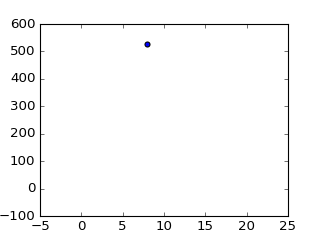

In [1]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class Ball:
    def __init__(self, m, x, y, vx, vy):
        self.m = m
        self.x, self.y = x, y
        self.vx, self.vy = vx, vy

    def run(self, fx, fy):
        self.x += self.vx
        self.y += self.vy
        self.vx += fx / self.m
        self.vy += fy / self.m

fig = plt.figure(figsize=(4,3))
images = []
ball = Ball(1,0,0,1,100)
for _ in range(22):
    image = plt.scatter([ball.x],[ball.y])
    images.append([image])
    fx = 0
    fy = -ball.m * 9.8
    ball.run(fx,fy)

ani = animation.ArtistAnimation(fig, images, interval=100, repeat_delay=1000)
plt.show()

## 連星の運動

計算に少し時間がかかるので注意する.
あと角運動量保存などの細かい挙動までは見ていない.

<IPython.core.display.Javascript object>


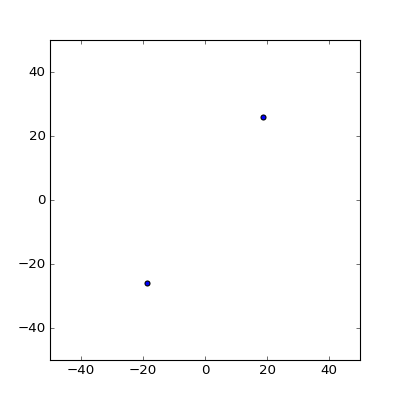

In [6]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class Ball:
    def __init__(self, m, x, y, vx, vy):
        self.m = m
        self.x, self.y = x, y
        self.vx, self.vy = vx, vy

    def run(self, fx, fy):
        self.x += self.vx
        self.y += self.vy
        self.vx += fx / self.m
        self.vy += fy / self.m

# 連星を定義
planet1 = Ball(10**11,0,10,-0.6,0)
planet2 = Ball(10**11,0,-10,0.6,0)
fig = plt.figure(figsize=(5,5))
images = []
plt.xlim(-50,50)
plt.ylim(-50,50)

# 万有引力定数
G = 6.6*10**(-11)

for i in range(1000):
    if i % 2 == 1:
        image = plt.scatter([planet1.x,planet2.x],[planet1.y,planet2.y])
        images.append([image])
    r2 = (planet1.x-planet2.x)**2 + (planet1.y-planet2.y)**2
    fx = G * np.sign(planet2.x - planet1.x) * (planet1.m * planet2.m)/r2
    fy = G * np.sign(planet2.y - planet1.y) * (planet1.m * planet2.m)/r2
    planet1.run(fx,fy)
    planet2.run(-fx,-fy)
    
ani = animation.ArtistAnimation(fig, images, interval=4, repeat_delay=1000)
plt.show()

## 花火

<IPython.core.display.Javascript object>


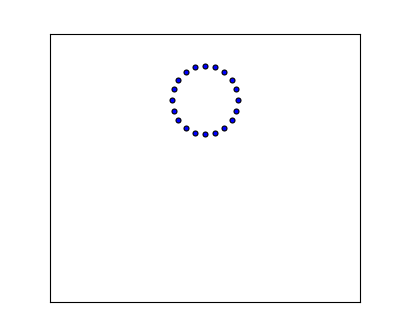

In [9]:
%matplotlib nbagg

fig = plt.figure(figsize=(5,4.2))
plt.xticks([])
plt.yticks([])
plt.xlim(-15000,15000)
plt.ylim(-20000,5000)
images = []

balls = []
num = 20
for i in range(num):
    vx = 200*np.cos(2*np.pi*i/num)
    vy = 200*np.sin(2*np.pi*i/num)
    balls.append(Ball(1,0,0,vx,vy))

for _ in range(110):
    xs, ys = [], []
    for ball in balls:
        xs.append(ball.x)
        ys.append(ball.y)
        fx = 0
        fy = -ball.m * 9.8
        ball.run(fx,fy)

    image = plt.scatter(xs, ys)
    images.append([image])

ani = animation.ArtistAnimation(fig, images, interval=30, repeat_delay=1000)
plt.show()

## 波の合成

<IPython.core.display.Javascript object>


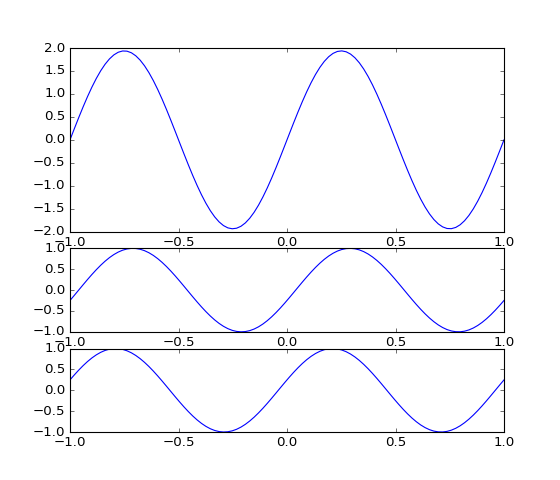

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def wave_right(xs,t):
    result = []
    for x in xs:
        if x+1>t*0.01:
            result.append(0)
        else:
            result.append(np.sin(2*np.pi*(x-t*0.01)))
    return np.array(result)

def wave_left(xs,t):
    result = []
    for x in xs:
        if x-1<-t*0.01:
            result.append(0)
        else:
            result.append(np.sin(2*np.pi*(x+t*0.01)))
    return np.array(result)

fig = plt.figure(figsize=(7,6))
subplot1 = plt.subplot2grid((4,1), (0,0), rowspan=2)
subplot2 = plt.subplot2grid((4,1), (2,0))
subplot3 = plt.subplot2grid((4,1), (3,0))
images = []

for t in range(0,400,2):
    linex = np.linspace(-1,1,100)
    liney = wave_right(linex, t)+wave_left(linex, t)
    image1, = subplot1.plot(linex, liney, color='blue')
    liney = wave_right(linex, t)
    image2, = subplot2.plot(linex, liney, color='blue')
    liney = wave_left(linex, t)
    image3, = subplot3.plot(linex, liney, color='blue')
    images.append([image1,image2,image3])

ani = animation.ArtistAnimation(fig, images, interval=30, repeat_delay=0)
plt.show()